<h1>Importation des packages et des fonctions</h1>

<p>Parmi les packages importés on retrouve :<br>
   <ul>
       <li>fonctionsUtiles : package qui sert pour l'augmentation des données</li>
       <li>matplotlib, numpy : visualisation et manipulation de données</li>
       <li>cv2 : pour resize les images et les adapter à l'input du modèle</li> 
       <li>sklearn : pour la fonction train_test_split</li>
       <li>Tensorflow, keras : framework pour deeplearning</li>
   </ul>
   <b>Attention :</b> le package keras n'est pas celui d'origine, un patch non officiel a été appliqué pour régler un problème de BatchNormalization qui faisait s'écrouler les métriques sur les jeu de validation et de test, donnant alors l'illusion d'un problème d'overfitting.<br><br>
   Lien vers le git mentionnant le problème et la solution : https://github.com/keras-team/keras/pull/9965
</p>

In [1]:
import sys
sys.path.append('../')

from fonctionsUtiles import functions as f
from fonctionsUtiles import architecture
from fonctionsUtiles import error

import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras import backend as K
tf.logging.set_verbosity(tf.logging.ERROR)

__init__


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h1>Chargement de toutes les données</h1>

<p>
    Importation de données recueillies via conduite du véhicule avec la caméra, dans des endroits différents avec un luminosité différente. Présence également de données issues d'un simulateur de données
</p>

In [2]:
# On load toutes les images sous forme de array numpy
Xcouloir=np.load('../Datasets/Regression/X_couloir.npy')
Xcouloir2=np.load('../Datasets/Regression/X_couloir2.npy')
Xcouloir3=np.load('../Datasets/Regression/X_couloir3.npy')
Xcouloir4=np.load('../Datasets/Regression/X_couloir4.npy')
Xcouloir5=np.load('../Datasets/Regression/X_couloir5.npy')
XcouloirLumineux=np.load('../Datasets/Regression/X_couloir_lumineux.npy')
XcouloirLumineux2=np.load('../Datasets/Regression/X_couloir_lumineux2.npy')
XcouloirLumineux3=np.load('../Datasets/Regression/X_couloir_lumineux3.npy')
Xcolomb=np.load('../Datasets/Regression/X_coulomb.npy')
Xsimulator=np.load('../Datasets/Regression/X_simulator.npy')
Xsimulator1=np.load('../Datasets/Regression/X_simulator1.npy')
Xparking=np.load('../Datasets/Regression/X_parking.npy')

# Idem pour les output correspondants à chaque image
Ycouloir=np.load('../Datasets/Regression/Y_couloir.npy')
Ycouloir2=np.load('../Datasets/Regression/Y_couloir2.npy')
Ycouloir3=np.load('../Datasets/Regression/Y_couloir3.npy')
Ycouloir4=np.load('../Datasets/Regression/Y_couloir4.npy')
Ycouloir5=np.load('../Datasets/Regression/Y_couloir5.npy')
YcouloirLumineux=np.load('../Datasets/Regression/Y_couloir_lumineux.npy')
YcouloirLumineux2=np.load('../Datasets/Regression/Y_couloir_lumineux2.npy')
YcouloirLumineux3=np.load('../Datasets/Regression/Y_couloir_lumineux3.npy')
Ycolomb=np.load('../Datasets/Regression/Y_coulomb.npy')
Ysimulator=np.load('../Datasets/Regression/Y_simulator.npy')
Ysimulator1=np.load('../Datasets/Regression/Y_simulator1.npy')
Yparking=np.load('../Datasets/Regression/Y_parking.npy')



print('Xcouloir data Loaded. Shape = ', np.shape(Xcouloir))
print('Xcouloir2 data Loaded. Shape = ', np.shape(Xcouloir2))
print('Xcouloir3 data Loaded. Shape = ', np.shape(Xcouloir3))
print('Xcouloir4 data Loaded. Shape = ', np.shape(Xcouloir4))
print('Xcouloir5 data Loaded. Shape = ', np.shape(Xcouloir5))
print('XcouloirLumineux data Loaded. Shape = ', np.shape(XcouloirLumineux))
print('XcouloirLumineux2 data Loaded. Shape = ', np.shape(XcouloirLumineux2))
print('XcouloirLumineux3 data Loaded. Shape = ', np.shape(XcouloirLumineux3))
print('Xcolomb data Loaded. Shape = ', np.shape(Xcolomb))
print('Xsimulator data Loaded. Shape = ', np.shape(Xsimulator))
print('Xsimulator1 data Loaded. Shape = ', np.shape(Xsimulator1))
print('Xparking data Loaded. Shape = ', np.shape(Xparking))

Xcouloir data Loaded. Shape =  (2419, 90, 250, 3)
Xcouloir2 data Loaded. Shape =  (3385, 90, 250, 3)
Xcouloir3 data Loaded. Shape =  (1275, 90, 250, 3)
Xcouloir4 data Loaded. Shape =  (4149, 90, 250, 3)
Xcouloir5 data Loaded. Shape =  (2944, 90, 250, 3)
XcouloirLumineux data Loaded. Shape =  (1666, 90, 250, 3)
XcouloirLumineux2 data Loaded. Shape =  (3239, 90, 250, 3)
XcouloirLumineux3 data Loaded. Shape =  (4151, 90, 250, 3)
Xcolomb data Loaded. Shape =  (4029, 90, 250, 3)
Xsimulator data Loaded. Shape =  (15000, 90, 250, 3)
Xsimulator1 data Loaded. Shape =  (15000, 90, 250, 3)


<p>
    On concatène toutes les données afin de travailler avec un seul vecteur
</p>

In [3]:
Xfinal=np.concatenate((Xcouloir,Xcouloir2,Xcouloir3,Xcouloir4,Xcouloir5,XcouloirLumineux,XcouloirLumineux2,XcouloirLumineux3,Xcolomb,Xsimulator,Xsimulator1,Xparking))
Yfinal=np.concatenate((Ycouloir,Ycouloir2,Ycouloir3,Ycouloir4,Ycouloir5,YcouloirLumineux,YcouloirLumineux2,YcouloirLumineux3,Ycolomb,Ysimulator,Ysimulator1,Yparking))
del Xcouloir,Xcouloir2,Xcouloir3,Xcouloir4,Xcouloir5,Ycouloir,Ycouloir2,Ycouloir3,Ycouloir4,Ycouloir5,
del XcouloirLumineux,XcouloirLumineux2,XcouloirLumineux3,YcouloirLumineux,YcouloirLumineux2,YcouloirLumineux3
del Xcolomb,Xsimulator,Xsimulator1,Ycolomb,Ysimulator,Ysimulator1,Yparking,Xparking
# On supprime également après toutes les variables temporaires pour libérer de l'espace en mémoire

print('Xfinal data Loaded. Shape = ', np.shape(Xfinal))

Xfinal data Loaded. Shape =  (57257, 90, 250, 3)


<h1>Resizing des données et tri des données non utilisables</h1>

<p>
    Pour l'approche Transfer Learning, il faut faire attention à l'input du modèle pré-entrainé que l'on utilise. Dans notre cas, MobileNetV2 admet en input des images de taille 224 x 224. Il faut donc resize les images qui sont de format 90 x 250
</p>

In [4]:
# Définition de la fonction qui prend chaque array et la resize au bon format
def resizing(array):
    masterX = list()
    for arr in array:
        masterX.append(cv2.resize(arr, (224,224)))
    return np.array(masterX)

Xfinal_resized = resizing(Xfinal)

print('All Xcouloir data new size. Shape = ', np.shape(Xfinal_resized))

All Xcouloir data new size. Shape =  (57257, 224, 224, 3)


<p>
    On enlève également les données qui comporte un angle (dans le vecteur Y) non compris entre 0 et 180 degrés. Ces données viennent du fait que la conduite à la main n'est pas forcément parfaite et que des données "aberrantes" ont pu être générées.
</p>

In [5]:
# On garde seulement les données d'angle d'entrainement compris entre 0 et 180 degrés (pas de marche arrière)
Xfinal_resized = Xfinal_resized[(Yfinal<180 )& (Yfinal>0)]
Yfinal = Yfinal[(Yfinal<180 )& (Yfinal>0)]
print('All Xcouloir data new size. Shape = ', np.shape(Xfinal_resized))

# On normalise les données pour l'entrainement
Yfinal = Yfinal/180

All Xcouloir data new size. Shape =  (55989, 224, 224, 3)


<h1>Séparation des données en Train, Test et Validation</h1>

<p>
    On sépare le jeu de données en Training set, Validation set et Testing set selon les proportions suivantes :<br>
    <ul>
        <li>X_test = 20 % du set Xfinal_resized</li>
        <li>X_train = 80 % des données restantes de Xfinal_resized (soit 64 % du jeu total de données)</li>
        <li>X_val = 20 % des données restantes de Xfinal_resized (soit 16 % du jeu total de données)</li>
    </ul>
</p>

In [6]:
# Dictionnaire qui stock quelques variables importantes
args = {"augmentation": True,
        "train_split": 0.8,
        "val_split":0.2,
        "test_split":0.2,
        "early_stop":True,
       "patience":2}

In [7]:
# Réparatition du jeu de données en train test 80 - 20 %
X_train, X_test, Y_train, Y_test = train_test_split(Xfinal_resized, Yfinal, test_size=0.2, random_state=12)

In [8]:
# Répartition du jeu d'entrainement en jeu d'entrainement et en jeu de validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=12)

In [9]:
print('All training data loaded and augmented. Shape = ', np.shape(X_train))
print('All validation data loaded and augmented. Shape = ', np.shape(X_val))
print('All testing data loaded and augmented. Shape = ', np.shape(X_test))

All training data loaded and augmented. Shape =  (35832, 224, 224, 3)
All validation data loaded and augmented. Shape =  (8959, 224, 224, 3)
All testing data loaded and augmented. Shape =  (11198, 224, 224, 3)


In [10]:
# Suppression des variables temporaires qui contiennent les images pour libérer de l'espace mémoire
del Xfinal, Xfinal_resized, Yfinal

<h1>Augmentation des données</h1>

<p>
    On augmente les données uniquement sur le jeu d'entrainement pour éviter que le jeu de validation et de test ne contiennent des données que le modèle aurait "déjà vu" pendant son entrainement.<br><br>
    On rajoute 10% d'image pour chacun des effets suivant :
    <ul>
        <li>luminosité augmentée</li>
        <li>effet de nuit</li>
        <li>ombres aléatoires sur la route</li>
    </ul>
</p>

In [11]:
# Data augmentation du dataset
if args['augmentation']:
    print('Augmenting data... Wait...')
    # Data augmentation 10% de luminosité aléatoire.
    X_bright, Y_bright = f.generate_brightness(X_train, Y_train, proportion=0.1)
    # Data augmentation 10% d'effet de nuit.
    X_night, Y_night = f.generate_night_effect(X_train, Y_train, proportion=0.1)
    # Data augmentation 10% d'ombres aléatoires.
    X_shadow, Y_shadow = f.generate_random_shadows(X_train, Y_train, proportion=0.1)

    # Concaténation des données générées avec les anciennes
    X_train = np.concatenate((X_train, X_bright, X_night,
                                 X_shadow))

    Y_train = np.concatenate((Y_train, Y_bright, Y_night, 
                                 Y_shadow)).astype('float32')

    print('Train data after augmentation. Shape = ', np.shape(X_train))

  2%|▏         | 62/3583 [00:00<00:05, 612.54it/s]

Augmenting data... Wait...


100%|██████████| 3583/3583 [00:06<00:00, 515.64it/s]


Train data after augmentation. Shape =  (46581, 224, 224, 3)


In [12]:
# Suppression des variables temporaires qui contiennent les images
del X_bright, Y_bright, X_night, Y_night, X_shadow, Y_shadow

<h1>Hyperparamètres</h1>

<p>
    On définit les hyperparamètres pour le modèle, ici la taille de l'input (<code>IMAGE_RES</code>), la taille des batch pour l'entrainement (<code>BATCH_SIZE</code>), et le nombre d'epoch pour la phase d'entrainement (<code>epochs</code>).
</p>

In [13]:
IMAGE_RES = 224
BATCH_SIZE = 40
epochs = 15


<h1>Définition du modèle</h1>

<p>
    On utilise le modèle MobileNetV2 comme base préentrainée. Les poids chargés sont ceux qui résultent de l'entrainement sur "ImageNet". On rajoute ensuite quelques layers personnalisées pour adapter le réseau à notre problème.
</p>

In [14]:
# Initialisation du modèle : on télécharge le modèle MobilNetV2 en ne prenant pas en compte la dernière couche car
# elle ne correspond pas à notre problème
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_RES, IMAGE_RES, 3))
l = Dense(128, activation = 'relu')(base_model.output)
l = Dropout(0.2)(l)
l = Dense(64, activation = 'relu')(l)
l = Dropout(0.2)(l)
l = Flatten()(l)
predictions = Dense(1, activation = 'linear')(l)
my_new_model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

<p>
    Le réseau MobileNetV2 sans la dernière couche comporte 331 couches. Afin de respecter l'approche Transfer Learning fixée, on n'autorise pas l'entrainement pour ces 311 couches, au contraire de celles que l'on a rajouté par la suite.
</p>

In [15]:
for layer in my_new_model.layers[:310]:
   layer.trainable = False
 
for layer in my_new_model.layers[311:]:
   layer.trainable = True

In [16]:
# Cette cellule nous permet d'examiner le réseau obtenu et de vérifier que les layers que l'on veut figer l'ont bien étés
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [17]:
# On définit la fonction d'optimisation du modèle
my_new_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

<h1>Schéma du modèle</h1>

<p>
    La cellule suivante permet d'obtenir une représentation imagée du réseau obtenu
</p>

In [ ]:
from keras.utils import plot_model
plot_model(my_new_model, to_file='model_reg.png')

<h1>Entrainement du modèle</h1>

<p>
    On effectue l'entrainement selon les jeux de données d'entrainement et de validation définis plus haut dans le notebook. On utilise également les hyperparamètres définis auparavant.
</p>

In [ ]:
min_delta=.0005

#checkpoint pour sauver le modèle après chaque epoch
save_best = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

#arrêt de l'entrainement dans le cas où la validation loss ne diminue plus
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=args['patience'], 
                                           verbose=1, 
                                           mode='auto')
callbacks_list = [save_best]

if args['early_stop']:
    callbacks_list.append(early_stop)

hist = my_new_model.fit(
                X_train, 
                Y_train,
                epochs = epochs,
                batch_size=BATCH_SIZE, 
                verbose=1, 
                validation_data=(X_val, Y_val),
                callbacks=callbacks_list,
                shuffle=True)

my_new_model.save('../Models/TransferInceptionV3_15Epochs_reg_keras_imp.h5')

Train on 46581 samples, validate on 8959 samples
Epoch 1/15
  480/46581 [..............................] - ETA: 40:35 - loss: 501.8637 - mean_squared_error: 501.8637

<h1>Temps de prédiction pour une image</h1>

<p>
    La cellule suivante utilise une image du jeu de test et calcule le temps qu'il faut pour effectuer la prédiction.
</p>

In [20]:
import time
start=time.time()
for i in range(len(X_test)):
    my_new_model.predict(X_test[i-1:i])

print((time.time()-start)/len(X_test))

0.03188062765956415


<h1>Evaluation du modèle</h1>

<p>La cellule suivante permet de tester le modèle selon un jeu de test qu'il n'a jamais vu auparavant. On peut voir si le modèle a overfit les données ou non.</p>

In [23]:
my_new_model.evaluate(X_test, Y_test)

11198/11198 [==============================] - 248s 22ms/step


[0.03061565657793826, 0.03061565657793826]

<h1>Divers tracés</h1>

<h3>Evolution de l'accuracy train et val en fonction du nombre d'epoch</h3>

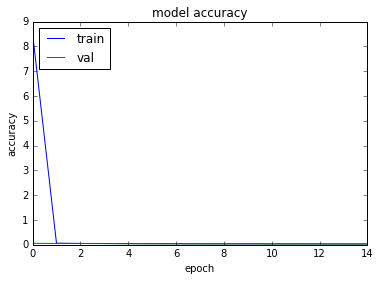

In [21]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h3>Evolution de la loss train et val en fonction du nombre d'epoch</h3>

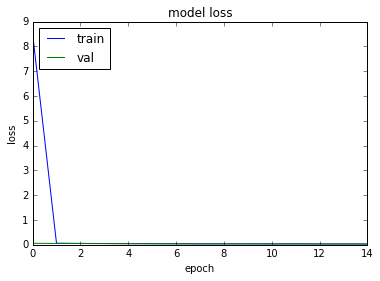

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h1>Chargement du modèle</h1>

<p>Les deux prochaines cellules servent à charger un modèle sauvegardé puis à l'évaluer sur un jeu de test. Attention cependant il faut redéfinir le jeux de test avant d'exécuter la deuxième cellule</p>

In [ ]:
# K.clear_session()
# K.set_learning_phase(1)
my_new_model = load_model('../Models/TransferInceptionV3_5Epochs_reg_keras_imp.h5')
my_new_model.summary()

In [ ]:
my_new_model.evaluate(X_test, Y_test)

<p>
    La cellule suivante permet d'évaluer l'erreur du modèle en degrés parmi les catégories suivantes : forte gauche, gauche, tout droit, droite, forte droite.
</p>

En général :
L'erreur relative moyenne est de  24.88844457420618
La standard deviation moyenne est de  19.300585671154824
forte droite
La moyenne des ecarts est de  54.695814273266286
La standard deviation est de  19.47856861102486
droite
La moyenne des ecarts est de  28.366479274185217
La standard deviation est de  17.10749380536971
tout droit
La moyenne des ecarts est de  11.718550236314341
La standard deviation est de  10.312888274435164
gauche
La moyenne des ecarts est de  20.259353677285535
La standard deviation est de  14.982734394673935
forte Gauche
La moyenne des ecarts est de  32.70269568665831
La standard deviation est de  21.631625064870985


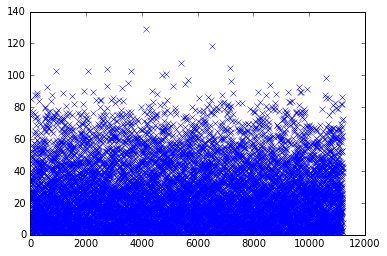

In [25]:
# On effectue la prédiction sur le jeu de test
Y_pred = my_new_model.predict(X_test)

# On effectue un petit traitement pour avoir un format des prédictions compatible avec la fonction utilisée ensuite
Y_pred1=[0]*len(Y_pred)
for i in range(len(Y_pred)):
    Y_pred1[i]=Y_pred[i][0]
Y_pred1=np.array(Y_pred1)

# On appelle la fonction error_regression qui calcule l'erreur en degrés
error.error_regression(Y_test,Y_pred1)